In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('..')
from utilities import model_src as s
from utilities.model import *
from utilities.model_prep import *
#import lagk_old.model_lagk as lagk


#import nwsrfs_models.main as s
#import lagk_f2py_old.model_lagk as lagk

#from utilities.model import Model

In [2]:
folder='/home/gwalters/Repo/nwrfc-auto-calibration/'

In [10]:
print(s.lagk.__doc__)

lagk_out,inflow_st_out,outflow_st_out,storage_st_out = lagk(ita,itb,lagtbl_a_in,lagtbl_b_in,lagtbl_c_in,lagtbl_d_in,ktbl_a_in,ktbl_b_in,ktbl_c_in,ktbl_d_in,lagk_lagmax_in,lagk_kmax_in,lagk_qmax_in,lagk_lagmin_in,lagk_kmin_in,lagk_qmin_in,ico_in,iinfl_in,ioutfl_in,istor_in,qa_in,[n_hrus,sim_length])

Wrapper for ``lagk``.

Parameters
----------
ita : input int
itb : input int
lagtbl_a_in : input rank-1 array('d') with bounds (n_hrus)
lagtbl_b_in : input rank-1 array('d') with bounds (n_hrus)
lagtbl_c_in : input rank-1 array('d') with bounds (n_hrus)
lagtbl_d_in : input rank-1 array('d') with bounds (n_hrus)
ktbl_a_in : input rank-1 array('d') with bounds (n_hrus)
ktbl_b_in : input rank-1 array('d') with bounds (n_hrus)
ktbl_c_in : input rank-1 array('d') with bounds (n_hrus)
ktbl_d_in : input rank-1 array('d') with bounds (n_hrus)
lagk_lagmax_in : input rank-1 array('d') with bounds (n_hrus)
lagk_kmax_in : input rank-1 array('d') with bounds (n_hrus)
lagk_qmax_in : input rank-1 array('d

In [3]:
conw1_chps=pd.read_excel(os.path.join(folder,'basins','Lagk_Testing','CONW1R_Lagk_Check.xlsx'),'Flows',index_col='Date_Time',parse_dates=True)
conw1=conw1_chps.CONW1.astype('f4').to_numpy()

sakw1_chps=pd.read_excel(os.path.join(folder,'basins','Lagk_Testing','SAKW1R_Lagk_Check.xlsx'),'Flows',index_col='Date_Time',parse_dates=True)
sakw1=sakw1_chps.SAKW1.astype('f4').to_numpy()

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [ ]:
pars_1zone = pd.read_csv(os.path.join(folder,'basins','TLMO3-1zone','results_01','pars_optimal.csv'))
pars_2zone = pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone','results_01','pars_optimal.csv'))
pars_2zone_2route = pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone-2route','results_01','pars_optimal.csv'))

forcings_1zone = [pd.read_csv(os.path.join(folder,'basins','TLMO3-1zone','forcing_TLMO3-1.csv'))]
forcings_2zone = [pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone','forcing_TLMO3-1.csv')),
                  pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone','forcing_TLMO3-2.csv'))]
forcings_2zone_2route = [pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone-2route','forcing_TLMO3-1.csv')),
                  pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone-2route','forcing_TLMO3-2.csv'))]

upflow_2zone_2route=[pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone-2route','upflow_CONW1.csv')),
                  pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone-2route','upflow_SAKW1.csv'))]

flow = pd.read_csv(os.path.join(folder,'basins','TLMO3-1zone','results_01','optimal_6h.csv'))
states = pd.read_csv(os.path.join(folder,'basins','TLMO3-2zone','results_01','optimal_states_6h.csv'))

flow.rename(columns={'sim_flow_cfs':'sim_flow_cfs_r'},inplace=True)

forcings_1zone[0].index = pd.to_datetime(forcings_1zone[0][['year', 'month', 'day', 'hour']])
for f in forcings_2zone:
    f.index = pd.to_datetime(f[['year', 'month', 'day', 'hour']])
for f in forcings_2zone_2route:
    f.index = pd.to_datetime(f[['year', 'month', 'day', 'hour']])
for f in upflow_2zone_2route:
    f.index = pd.to_datetime(f[['year', 'month', 'day', 'hour']])
flow.index = pd.to_datetime(flow[['year', 'month', 'day', 'hour']])
flow['datetime'] = flow.index

#basin = 'TLMO3'

#fa_limits_basin = pd.read_csv(os.path.join(folder,'forcing-adj-limits_climo.csv'))
#fa_limits_basin = fa_limits_basin[(fa_limits_basin['basin']==basin) &
#                      (fa_limits_basin['zone']==basin+'-1')].copy()

In [ ]:
help(s)

In [ ]:
m_2zone_2route.uptribs[:,1]

In [ ]:
wrapper=pd.DataFrame(route,index=upflow_2zone_2route[1].index)
sa=pd.DataFrame(m_2zone_2route.uptribs[:,1],index=upflow_2zone_2route[0].index)

d_start='11/5/1984'
d_end='2/15/1985'

plt.plot(wrapper.loc[d_start:d_end],label='down')
plt.plot(sa.loc[d_start:d_end],label='up')
plt.legend()

In [ ]:
m_2zone_2route = Model(forcings_2zone_2route,pars_2zone_2route,upflow_2zone_2route,flow)
route=m_2zone_2route.lagk_run(1)

In [ ]:
m_2zone_2route = Model(forcings_2zone_2route,pars_2zone_2route,upflow_2zone_2route,flow)
par=m_2zone_2route.p
z=[0,1]

t=s.lagk(m_2zone_2route.dt_hours,m_2zone_2route.dt_hours,'METR',par['lagq'][:,z],
                    par['kq'][:,z], par['init_co'][z],par['init_if'][z],
                    par['init_of'][z],par['init_stor'][z],
                    m_2zone_2route.uptribs[:,z]*0.0283168)



plt.plot(pd.DataFrame(t,index=upflow_2zone_2route[0].index))
#k_start=int(t[17])
#k_len=int(t[k_start-1])
#pina7_len=int(t[k_start+2*k_len])
#p_end=k_start+2*(k_len+pina7_len)+1
#t=t[:p_end]
#t

In [ ]:
m_2zone_2route = Model(forcings_2zone_2route,pars_2zone_2route,upflow_2zone_2route,flow)
par=m_2zone_2route.p
z=0

p, c = lagk.pin7(m_2zone_2route.dt_hours,m_2zone_2route.dt_hours,par['n_lagq'][z],par['n_kq'][z],
        'METR',par['lagq'][:,z],par['kq'][:,z],par['init_co'][z],par['init_if'][z],par['init_of'][z],
        par['init_stor'][z])


c_copy=c.copy()
qb=lagk.flag7(p,c_copy,m_2zone_2route.uptribs[:,z]*0.0283168)
qc=lagk.fka7(p,c_copy,qb)

#c_copy=c.copy()
#qb=s.flag7(p,c_copy,sakw1*0.0283168)
#k_start=int(p[17])
#k_len=int(p[k_start-1])
#pina7_len=int(p[k_start+2*k_len])
#p_end=k_start+2*(k_len+pina7_len)+1
#p=p[:p_end]
#p

In [ ]:
wrapper=pd.DataFrame(t,index=upflow_2zone_2route[0].index)
sa=pd.DataFrame(qc,index=upflow_2zone_2route[0].index)

d_start='11/5/1984'
d_end='2/15/1985'

plt.plot(wrapper.loc[d_start:d_end])
plt.plot(sa.loc[d_start:d_end])

In [3]:
lid='MNSW1'
run='results_por_08'
run_dir=os.path.join(folder,'Runs','uh_shift','2zone',lid)

forcing, pars, upflow, flow =nwsrfs_prep(run_dir,run)
sim = Model(forcing,pars,upflow,flow)

chps_lagk=pd.read_csv('MNSW1_LagK_Debug.csv',index_col='GMT',parse_dates=True)
chps_lagk.index=chps_lagk.index+pd.Timedelta(-6, unit='H')

In [4]:
#RUN LAGK#
ts_in=6
ts_out=6
units='METR'#'ENGL'#'METR'
if units =='METR':
    lagq=np.array([9.42, 7.68, 8.66, 47.86, 7.83, 88.05, 6.92, 128.23, 5.95, 168.41,4.90, 208.60, 3.78, 248.78, 2.59, 288.96, 2.0, 329.15, 2.0, 369.33,2.0,409.51],dtype='f4')
    kq=np.array([4.54, 7.68, 3.56, 47.86, 2.49, 88.05,1.33, 128.23, .07, 168.41,0.0, 208.60, 0.0, 248.78, 0.0, 288.96, 0.0, 329.15, 0.0, 369.33,0.0,409.51],dtype='f4')
    init_co=float(6025*0.0283168e0)
    init_if=float(6018*0.0283168e0)
    init_of=float(6018*0.0283168e0)
    init_stor=float(6307*0.0283168e0)   
else:
    lagq=np.array([9.42, 271.25, 8.66, 1690.31, 7.83, 3109.36, 6.92, 4528.42, 5.95, 5947.47,4.90, 7366.52, 3.78, 8785.58, 2.59, 10204.63, 2.0, 11623.69, 2.0, 13042.74,2.0,14461.79],dtype='f4')
    kq=np.array([4.54, 271.25, 3.56, 1690.31, 2.49, 3109.36,1.33, 4528.42, .07, 5947.47,0.0, 7366.52, 0.0, 8785.58, 0.0, 10204.63, 0.0, 11623.69, 0.0, 13042.74,0.0,14461.79],dtype='f4')
    init_co=float(6025)
    init_if=float(6018)
    init_of=float(6018)
    init_stor=float(6307)

len_lagq=len(lagq)/2
len_kq=len(kq)/2

In [5]:
p=np.empty(500,dtype='f4')
c=np.empty(100,dtype='f4')
s.pin7(p,c,ts_in,ts_out,len_lagq,len_kq,units,lagq,kq,init_co,init_if,init_of,init_stor)
#p, c = s.pin7(ts_in,ts_out,len_lagq,len_kq,units,lagq,kq,init_co,init_if,init_of,init_stor)

In [6]:
k_start=int(p[17])
k_len=int(p[k_start-1])
pina7_len=int(p[k_start+2*k_len])
p_end=k_start+2*(k_len+pina7_len)+1
p=p[:p_end]
c=c[:int(c[0])]

In [7]:
print(s.flag7.__doc__)

flag7(p,c,qa,qb,co_st,co_time,[ndt])

Wrapper for ``flag7``.

Parameters
----------
p : input rank-1 array('f') with bounds (*)
c : input rank-1 array('f') with bounds (*)
qa : input rank-1 array('f') with bounds (ndt)
qb : input rank-1 array('f') with bounds (ndt)
co_st : input rank-1 array('f') with bounds (ndt)
co_time : input rank-1 array('f') with bounds (ndt)

Other Parameters
----------------
ndt : input int, optional
    Default: len(qa)



In [7]:
c_copy=c.copy()
qb=np.empty(len(sim.uptribs),dtype='f4')
co=np.empty(len(sim.uptribs),dtype='f4')
co_time=np.empty(len(sim.uptribs),dtype='f4')
s.flag7(p,c_copy,sim.uptribs*0.0283168,qb,co,co_time)

In [113]:
c_copy

array([ 11.01     , 170.4105   , 170.4105   , 178.59406  ,   3.01     ,
         5.912009 ,   3.40625  ,   5.7422857,   9.40625  ,   0.       ,
         0.       ], dtype=float32)

In [14]:
c_copy=c.copy()
#qb=s.flag7(p,c_copy,sakw1*0.0283168)
#qc=s.fka7(p,c_copy,qb)

qb=np.empty(len(sim.uptribs),dtype='f4')
s.flag7(p,c_copy,sim.uptribs*0.0283168,qb)
qc=np.empty(len(sim.uptribs),dtype='f4')
s.fka7(p,c_copy,qb,qc)

#fortran_output=pd.DataFrame({'Lagged':qb,'Attenuated':qc},index=sakw1_chps.index)
fortran_output=pd.DataFrame({'Lagged':qb,'Attenuated':qc},index=sim.dates)

#ts_test['Lagged']=qb*35.3147#qb[:len(ts)]*35.3147
#ts_test['Attenuated']=qc*35.3147#qb[:len(ts)]*35.3147
#ts_test.to_csv(os.path.join(folder,'Lag_Operation_Output.csv'))

start='Nov 5 1990'
end='Nov 17 1990'
    
#plt.plot(sakw1_chps.loc[start:end].SAKW1*0.0283168,label='IN')
plt.plot(upflow[0].loc[start:end,'flow_cfs']*0.0283168,label='IN')
plt.plot(fortran_output.loc[start:end].Lagged,label='Lagged')
plt.plot(fortran_output.loc[start:end].Attenuated,label='Attenuated')#,linestyle=':')
plt.plot(chps_lagk.loc[start:end,'Lag_Tbl-K_Tbl']*0.0283168,linestyle=':',label='CHPS_Output')
#plt.plot(sakw1_chps.loc[start:end].SAKW1R*0.0283168,label='CHPS_Output')
#plt.plot(ts_test_lagged*0.0283168,label='Lagged')
#plt.plot(ts_test.index,qc[:len(ts)],label='Attenuated')

plt.xlabel('Timestep') 
plt.ylabel('Streamflow (cms)')

plt.legend()
 
plt.rcParams["figure.figsize"] = (10,10)
#ts_test['Lagged']=qb[:len(ts)]*35.3147
#ts_test['Attenuated']=qc[:len(ts)]*35.3147
#ts_test.to_csv(os.path.join(folder,'Lag_Operation_Output.csv'))

NameError: name 'sim' is not defined

<AxesSubplot:>

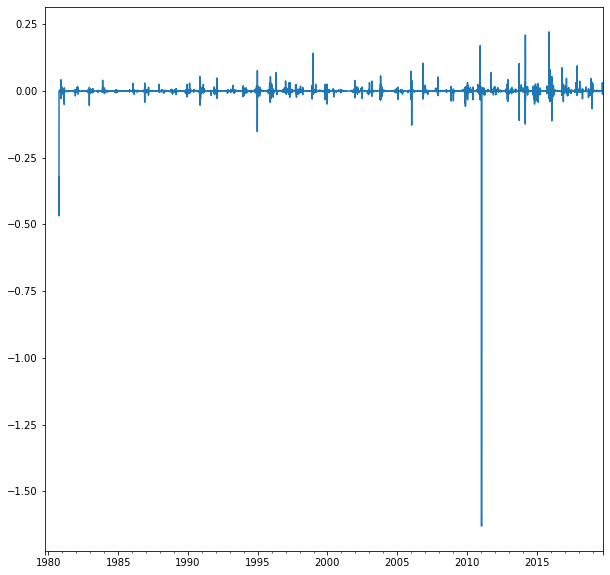

In [14]:
diff=fortran_output.Attenuated-chps_lagk.loc[:,'Lag_Tbl-K_Tbl']*0.0283168
diff.plot()

In [ ]:
ops_lagk_parm.loc[:,((ops_lagk_parm.columns.str.contains('LAG'))&(~ops_lagk_parm.columns.str.contains('_')))|(ops_lagk_parm.columns.str.contains('CONSTANT_LAG'))].max()

In [ ]:
ops_lagk_parm.loc[:,((ops_lagk_parm.columns.str.contains('K'))&(~ops_lagk_parm.columns.str.contains('_')))|(ops_lagk_parm.columns.str.contains('CONSTANT_K'))].max()

In [ ]:
ops_lagk_parm=pd.read_csv('LAGK_Parameters.csv',index_col='Id')
lag=ops_lagk_parm.loc[:,(ops_lagk_parm.columns.str.contains('LAG'))&(~ops_lagk_parm.columns.str.contains('_'))]
lag_q=ops_lagk_parm.loc[:,ops_lagk_parm.columns.str.contains('LAG_')&(~ops_lagk_parm.columns.str.contains('CONSTANT'))]

k=ops_lagk_parm.loc[:,(ops_lagk_parm.columns.str.contains('K'))&(~ops_lagk_parm.columns.str.contains('_'))]
k_q=ops_lagk_parm.loc[:,ops_lagk_parm.columns.str.contains('K_')&(~ops_lagk_parm.columns.str.contains('CONSTANT'))]

In [ ]:
if len(lag_df)>1 or len(k_df)>1:
    print(True)

In [ ]:
for lid in range(len(ops_lagk_parm)):

    lag_df=pd.DataFrame({'Q':lag_q.loc[lag_q.index[lid]].values},index=lag.loc[lag.index[lid]].values).dropna()
    k_df=pd.DataFrame({'Lag':k_q.loc[k_q.index[lid]].values},index=k.loc[k.index[lid]].values).dropna()

    if len(lag_df)>1 or len(k_df)>1:

        fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, dpi= 80, facecolor='w',figsize=(10, 10))

        if len(lag_df)>1:
            ax1.plot(lag_df)
        if len(k_df)>1:
            ax2.plot(k_df)

        ax1.set_xlabel('Lag (hr)')
        ax2.set_xlabel('k (hr)')
        ax1.set_ylabel('Streamflow (Q)')
        ax2.set_ylabel('Streamflow (Q)')

        ax1.grid()
        ax2.grid()

        ax1.title.set_text('LAG-Q')
        ax2.title.set_text('K-Q')

        fig.suptitle(ops_lagk_parm.index[lid], fontsize=16)

        #Set tight layout
        fig.tight_layout

        fig.savefig('legacy_lagk_tables\\'+ops_lagk_parm.index[lid]+'_tables.png')

        plt.clf()
        plt.close('all')  

In [ ]:
range(len(ops_lagk_parm))